In [ ]:
import numpy as np
import pandas as pd
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob as gb
import numpy as np
import tensorflow as tn
import keras
from keras.layers import Conv2D , Dense ,Flatten,MaxPool2D
from keras.models import Sequential
%matplotlib inline


In [ ]:
trainpath='/kaggle/input/intel-image-classification/seg_train'

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!echo '{"username":"elhambagheri1998","key":"68e7dce3486147f92004ad5e5f0a4e33"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download --force -d buraktaci/multiple-sclerosis

100% 630M/630M [00:19<00:00, 35.9MB/s]
100% 630M/630M [00:19<00:00, 34.0MB/s]


In [ ]:
!unzip -q "multiple-sclerosis.zip"

In [ ]:
import os
import glob as gb

base_path = '/content/'

train_path = os.path.join(base_path, 'Multiple Sclerosis')

folders = os.listdir(train_path)

for folder in folders:
    folder_path = os.path.join(train_path, folder)

    files = gb.glob(os.path.join(folder_path, '*.png'))

    print(f"For training data, found {len(files)} in folder {folder}")



For training data, found 1014 in folder Control-Sagittal
For training data, found 761 in folder MS-Sagittal
For training data, found 1002 in folder Control-Axial
For training data, found 650 in folder MS-Axial


In [ ]:
size = []
for folder in folders:
    folder_path = os.path.join(train_path, folder)
    files = gb.glob(os.path.join(folder_path, '*.png'))
    for file in files:
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(569, 1158, 4)    2764
(638, 1222, 4)     425
(628, 1158, 4)     170
(695, 1222, 4)      46
(661, 1493, 4)      14
(618, 758, 4)        2
(719, 1493, 4)       2
(687, 912, 4)        1
(515, 450, 4)        1
(543, 487, 4)        1
(606, 722, 4)        1
dtype: int64

In [ ]:
code ={'Control-Axial':0,'Control-Sagittal':1,'MS-Axial':2,'MS-Sagittal':3}

def get_code(n) :
    for x , y in code.items():
        if n==y :
            return x

In [ ]:
import cv2

In [ ]:
s = 100

In [ ]:
x_train= []
y_train= []
for folder in folders:
    folder_path = os.path.join(train_path, folder)
    files = gb.glob(os.path.join(folder_path, '*.png'))
    for file in files:
        image =cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        x_train.append(list(image_array))
        y_train.append(code[folder])


In [ ]:
print(f'we have {len(x_train)} in x_train')

we have 3427 in x_train


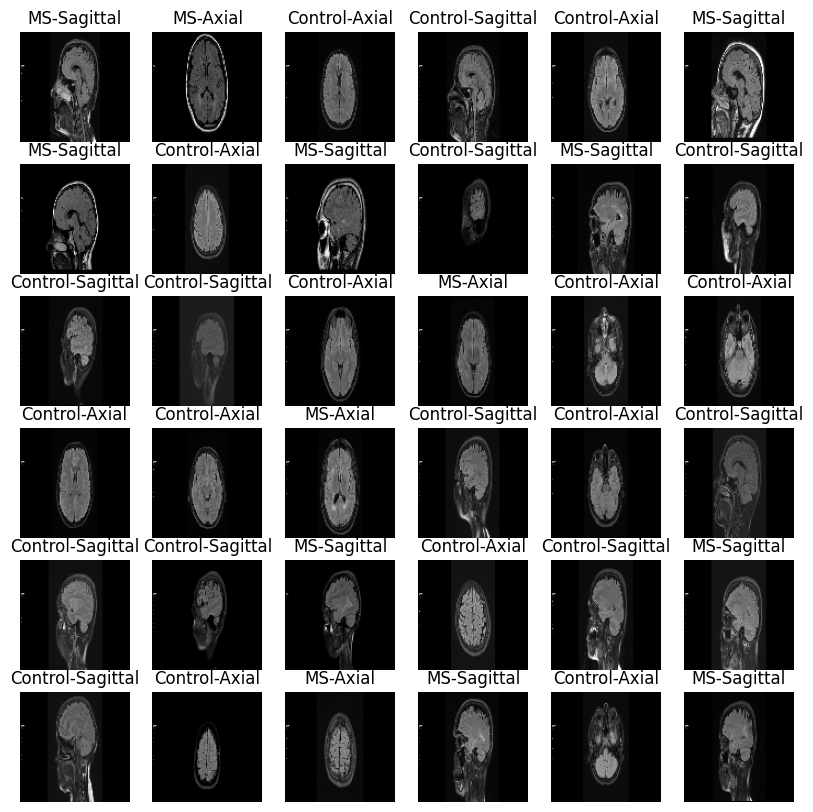

In [ ]:
plt.figure(figsize=(10,10))
for n , i in enumerate(list(np.random.randint(0,len(x_train),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(x_train[i])
    plt.axis('Off')
    plt.title(get_code(y_train[i]))

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
print(f'x_train shape is {x_train.shape}')
print(f'y_train shape is {y_train.shape}')

x_train shape is (3427, 100, 100, 3)
y_train shape is (3427,)


In [ ]:
from keras.layers import MaxPooling2D,Dropout

58889256/58889256 [==============================] - 2s 0us/step
Epoch 1/30
86/86 [==============================] - 17s 60ms/step - loss: 1.0530 - accuracy: 0.5319 - val_loss: 0.7556 - val_accuracy: 0.6793
Epoch 2/30
86/86 [==============================] - 3s 35ms/step - loss: 0.7232 - accuracy: 0.6530 - val_loss: 0.6432 - val_accuracy: 0.6968
Epoch 3/30
86/86 [==============================] - 3s 40ms/step - loss: 0.6458 - accuracy: 0.6713 - val_loss: 0.5988 - val_accuracy: 0.7085
Epoch 4/30
86/86 [==============================] - 3s 35ms/step - loss: 0.6001 - accuracy: 0.6976 - val_loss: 0.5749 - val_accuracy: 0.7289
Epoch 5/30
86/86 [==============================] - 3s 39ms/step - loss: 0.5712 - accuracy: 0.7198 - val_loss: 0.5711 - val_accuracy: 0.6910
Epoch 6/30
86/86 [==============================] - 3s 39ms/step - loss: 0.5533 - accuracy: 0.7249 - val_loss: 0.5384 - val_accuracy: 0.7434
Epoch 7/30
86/86 [==============================] - 3s 39ms/step - loss: 0.5302 - accura

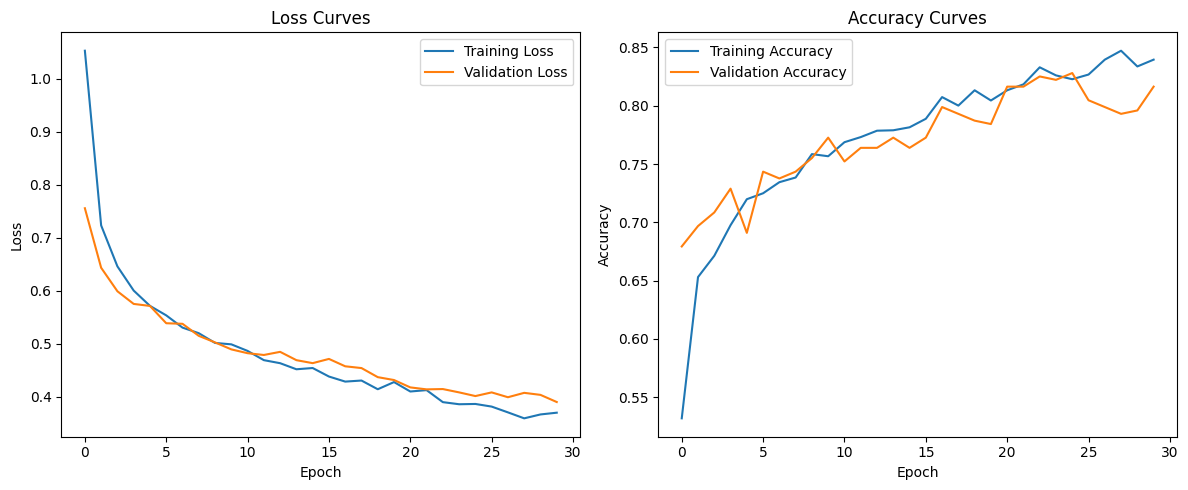

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D
import matplotlib.pyplot as plt

x_train, x_val_test, y_train, y_val_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=42)

x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

num_classes = 4

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(s, s, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


y_train_encoded = to_categorical(y_train, num_classes)
y_val_encoded = to_categorical(y_val, num_classes)

history = model.fit(x_train, y_train_encoded,
                    batch_size=32,
                    epochs=30,
                    validation_data=(x_val, y_val_encoded))

y_test_encoded = to_categorical(y_test, num_classes)
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=2)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')

plt.tight_layout()
plt.show()


11/11 [==============================] - 0s 28ms/step
Classification Report:
               precision    recall  f1-score   support

     Class 0       0.85      0.94      0.89       101
     Class 1       0.88      0.89      0.89       104
     Class 2       0.87      0.70      0.77        56
     Class 3       0.86      0.84      0.85        82

    accuracy                           0.86       343
   macro avg       0.86      0.84      0.85       343
weighted avg       0.86      0.86      0.86       343

Weighted Precision: 0.8635
Weighted Recall: 0.8630
Weighted F1-score: 0.8610


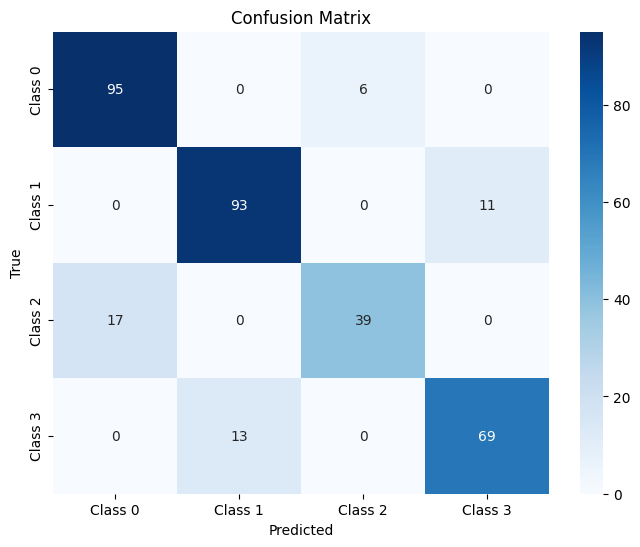

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import numpy as np


true_labels = y_test


predicted_probabilities = model.predict(x_test)

predicted_labels = np.argmax(predicted_probabilities, axis=1)


report = classification_report(true_labels, predicted_labels, target_names=[f'Class {i}' for i in range(num_classes)])
print("Classification Report:\n", report)


precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-score: {f1:.4f}")

cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in range(num_classes)],
            yticklabels=[f'Class {i}' for i in range(num_classes)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from tensorflow.keras.models import load_model
model.save("VGG16.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
